Homework 2: Linear regression and gradient descent 

In [1]:
import numpy as np

import pandas as pd
df = pd.read_csv('mpg.csv')

In [37]:
df=df.drop('name', axis=1)

In [38]:
print(df.loc[354])

mpg             34.5
cylinders          4
displacement     100
horsepower         ?
weight          2320
acceleration    15.8
model_year        81
origin             2
Name: 354, dtype: object


In [39]:
import numpy as np

df = df.replace('?', np.nan)
df = df.dropna()

In [40]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [2]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df = pd.get_dummies(df, columns=['origin'])

In [42]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,1,0,0


In [43]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

In [22]:
from sklearn.model_selection import train_test_split

# Split X and y on training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
# feed the linear regression with the train data to obtain a model.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:

coefficients = []
# add beta0
coefficients.append(regression_model.intercept_[0]) 
equation = 'Y = ' + str(round(coefficients[0],2))
for i in range(X_train.shape[1]):
    coefficients.append(regression_model.coef_[0][i])
    equation += ' + ' + str(round(regression_model.coef_[0][i],2))+'X'+str(i+1)
    
# print result equation
print(equation)

Y = -17.96 + -0.17X1 + 0.02X2 + -0.01X3 + -0.01X4 + 0.19X5 + 0.77X6 + -1.76X7 + 0.96X8 + 0.8X9


In [48]:
regression_model.score(X_test, y_test)

0.8285937887753855

In [49]:
from sklearn.metrics import mean_squared_error
import math

y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

print(math.sqrt(regression_model_mse))

3.447066660016476


In [50]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

array([[28.79446916]])

Text(0,0.5,'y')

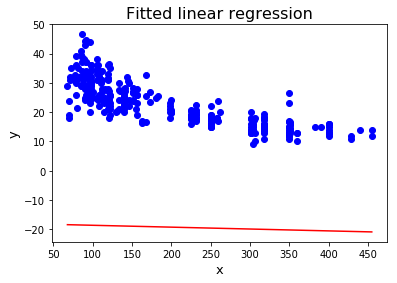

In [51]:
import matplotlib.pyplot as plt

projected_column = 'displacement'
max_x = np.int64(X_train[projected_column].max())
min_x = np.int64(X_train[projected_column].min())
x = list(X_train[projected_column])
y = list(y_train['mpg'])
m = coefficients[df.columns.get_loc(projected_column)+1]
b = coefficients[0]
# now we are going to plot the points and the model obtained
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)

Gradient Descent:

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def generate_data(b1, b0, size, x_range = (-10, 10), noise_mean = 0, noise_std = 1):
    """
	input:
	b1, b0 - true parameters of data
	size - size of data, numbers of samples
    x_range - tuple of (min, max) x-values
    noise_mean - noise mean value
    noise_std - noise standard deviation
	
	output:
	data_x, data_y - data features
	"""
    noise = np.random.normal(noise_mean, noise_std, size)
    # rnd_vals = np.random.rand(size)
    # data_x = np.random.choice(x_range[1]-x_range[0], size)
    data_x = np.linspace(start=x_range[0], stop=x_range[1], num=size)
    data_y = b1 * data_x + b0 + noise
	
    return data_x, data_y

In [64]:
data_x, data_y = generate_data(2.5, -7, 100)

In [55]:
data_x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [65]:
def predict(x, y):
	"""
	input:
	x, y - data features
	
	output:
	b1, b0 - predicted parameters of data
	"""
	mean_x = x.mean()
	mean_y = y.mean()

	b1 = np.dot(y - mean_y, x - mean_x) / np.dot(x - mean_x, x - mean_x)
	b0 = mean_y - b1*mean_x

	return b1, b0

In [66]:
b1, b0=predict(data_x, data_y)
print(b0, b1)

-6.772906570920285 2.493572952897228


In [67]:
def animate(data_x, data_y, true_b1, true_b0, b1, b0, x_range = (-10,10), label="Least squares"):
	plt.scatter(data_x, data_y)
	plt.plot([x_range[0], x_range[1]], 
           [x_range[0]*true_b1 + true_b0, x_range[1]*true_b1 + true_b0], 
           c="r", linewidth=2, label="True")
	plt.plot([x_range[0], x_range[1]], 
           [x_range[0]*b1 + b0, x_range[1]*b1 + b0], 
           c="g", linewidth=2, label=label)
	plt.legend()
	plt.show()

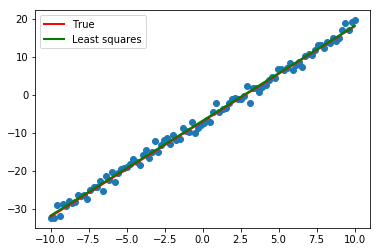

In [70]:
animate(data_x, data_y, 2.5, -7, b1, b0)

In [71]:
def gradient(x, y, alpha):
    
    w=np.array([-1.0,1.0])
    N=len(x)
    iteration=1
    
    #new_w=np.array([1.0,1.0])
    #b1, b0 = 1, -1
    #error=1
    while iteration<1000:    
        #delta= -y + (b1*x + b0)
        delta= -y + (w[1]*x + w[0])

        db0 = 2*np.sum(delta)/N
        db1 = 2*np.dot(delta,x)/N
        
        #b1=b1 - alpha*db1
        #b0=b0 - alpha*db0
        w[1] = w[1] - alpha*db1
        w[0] = w[0] - alpha*db0
            
        #error=np.sum(abs(new_w - w))
        #w=new_w
        iteration+=1
        
    return w

In [72]:
gradient(data_x, data_y, 0.01)

array([-6.77290656,  2.49357295])

In [178]:
def gradient_descent(x, y, lr=1e-2, N=1000):
	# b1, b0 = np.random.random(size=2)
	b1, b0 = 1, -1

	iteration = 0
	while iteration < N:
		delta = b1 * x + b0 - y
		db0 = 2 * np.sum(delta) / N
		db1 = 2 * np.dot(delta, x) / N

		b1 = b1 - lr * db1
		b0 = b0 - lr * db0
		iteration += 1

	return b1, b0

In [22]:
gradient_descent(data_x, data_y)

NameError: name 'gradient_descent' is not defined